In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from wordcloud import *
from collections import defaultdict
# from scipy.misc import imread
import imageio
import re

In [2]:
propFile=open('edit.prop')
texts=propFile.read()
texts

'filename=<Data/违规信息-三个行业.xlsx>\ntitle=<Activity>\nignoreword=<）,（,、,一种,的,及,方法,社会,保障局,和,广东,广州,“,”>\nbackground=<love.jpg>\nfontfile=<STFANGSO.TTF>\nbackground_color=<white>\nmax_words=<200>\nignor_blow_num=<0>\npicture_width=<500>\npicture_height=<300>'

In [3]:

dicts={}
matchFilename = re.match( r'filename=<(.*)>[.\n]title=<(.*)>[.\n]ignoreword=<(.*)>[.\n]background=<(.*)>[.\n]fontfile=<(.*)>', texts, re.M|re.DOTALL)
if matchFilename:
    dicts={'fn':matchFilename.group(1),'tt':matchFilename.group(2),'ignw':matchFilename.group(3),'bg':matchFilename.group(4)}
else:
    print("No matchFilename!!")
filename=dicts['fn']
filename

'Data/违规信息-三个行业.xlsx'

In [4]:
csv=mateItems=pd.read_excel(dicts['fn'],encoding='utf-8')
csv

,ViolationID,Symbol,DisposalDate,DeclareDate,Promulgator,FileName,DocumentNumber,Supervisor,ViolationType,ViolationTypeID,Law,ViolationYear,Activity,PunishmentMeasure,SumPenalty,IsViolated,PunishmentType,PunishmentTypeID,Penalty
0,4052180,520,2018-01-24,2018-01-25,上市公司,关于公司控股股东收到湖北证监局行政监管措施决定书的公告,[2018]5号,其他(中国证监会湖北监管局),"重大遗漏,其他","P2505,P2599",违反了《上市公司信息披露管理办法》第四十六条之规定。,NaN,"经查,我局发现你公司作为长航凤凰股份有限公司(以下简称长航凤凰)的控股股东,在所持长航凤凰股...","根据《上市公司信息披露管理办法》第五十九条之规定,我局决定对你公司采取出具警示函的行政监管措施。",NaN,N,NaN,NaN,NaN
1,4056154,586,2018-08-17,2018-08-20,深圳证券交易所,关于对上海乐铮网络科技有限公司、安徽鸿旭新能源汽车有限公司给予公开谴责处分的决定,NaN,深圳证券交易所,"重大遗漏,其他","P2505,P2599",未按照中国证监会《公开发行证券的公司信息披露内容与格式准则第17号一一要约收购报告书》第四十...,"2017,2018","经查明,上海乐铮网络科技有限公司(以下简称“上海乐铮”)、安徽鸿旭新能源汽车有限公司(以下简...","鉴于上述违规事实及情节,依据本所《股票上市规则(2014年修订)》第17.2条和《股票上市规...",NaN,N,NaN,NaN,NaN
2,4053699,586,2018-03-29,2018-04-04,上市公司,关于深圳证券交易所《关于对四川汇源光通信股份有限公司股东要约收购信息披露事项的监管函》的公告,公司部监管函[2018]第41号,深圳证券交易所,"重大遗漏,其他","P2505,P2599",违反了本所《股票上市规则(2014年修订)》1.4条、2.3条和《上市公司要约收购业务指引(...,2018,监管函具体内容如下:“上海乐铮网络科技有限公司、安徽鸿旭新能源汽车有限公司:你们作为一致行动...,"希望你们吸取教训,严格遵守《证券法》《公司法》等法规及《股票上市规则》的规定,及时披露要约收...",NaN,Y,其他,P2699,NaN
3,4056422,636,2018-09-10,2018-09-10,深圳证券交易所,关于对广东风华高新科技股份有限公司及相关当事人给予纪律处分的决定,NaN,深圳证券交易所,一般会计处理不当,P2515,"违反了本所《股票上市规则(2014年修订)》第2.1条,《股票上市规则(2018年修订)》第...",2016,"经查明,广东风华高新科技股份有限公司(以下简称“风华高科”)存在以下违规行为:2018年4月...","鉴于风华高科及相关当事人的上述违规事实和情节,依据本所《股票上市规则(2014年修订)》第1...",NaN,Y,批评,P2601,NaN
4,4055741,636,2018-07-25,2018-07-27,上市公司,关于中国证监会广东监管局对公司和部分时任及现任董事及高级管理人员采取出具警示函等措施的决定的公告,"[2018]35号,[2018]36号、37号、38号、39号、40号、41号",其他(中国证监会广东监管局),"推迟披露,重大遗漏,一般会计处理不当,其他","P2504,P2505,P2515,P2599","违反了《上市公司信息披露管理办法》第二条、第三十条、第三十一条等规定,不符合《上市公司信息披...","2016,2017,2018","一、《决定书1》全文内容“广东风华高新科技股份有限公司:经查,我局发现你公司存在以下问题:一...","一、《决定书1》:根据《上市公司信息披露管理办法》第五十九条的规定,我局决定,对上述第一、三...",NaN,Y,其他,P2699,NaN
5,4062360,670,2019-05-24,2019-05-27,上市公司,关于收到中国证券监督管理委员会《行政处罚及市场禁入事先告知书》的公告,处罚字〔2019〕70号,中国证监会,"虚构利润,其他","P2501,P2599",不符合《企业会计准则-基本准则》第十二条“企业应当以实际发生的交易或者事项为依据进行会计确认...,"2015,2016","一、盈方微约定开展数据中心服务业务,但2015年8月、9月并未实际履行相关义务2015年开始...","依据《证券法》第一百九十三条第一款的规定:1.对盈方微责令改正,给予警告,并处以罚款60万元...",1280000.00,Y,"警告,罚款,其他","P2602,P2604,P2699",600000.0
6,4062423,835,2019-05-28,2019-05-29,上市公司,关于控股股东收到行政监管措施决定的公告,【2019】12号,其他(中国证监会四川监管局),推迟披露,P2504,违反了《上市公司信息披露管理办法》(证监会令第40号)第四十六条第二款的规定。,2019,"长城集团所持长城动漫股票分别于2019年1月29日,2月15日,2月25日,3月25日被轮候...","根据《上市公司信息披露管理办法》(证监会令第40号)第五十九条第三款的规定,四川证监局决定对...",NaN,N,NaN,NaN,NaN
7,4049217,885,2017-09-04,2017-09-11,深圳证券交易所,关于对天瑞集团股份有限公司给予通报批评处分的决定,NaN,深圳证券交易所,"推迟披露,违规买卖股票,其他","P2504,P2512,P2599","没有按照《证券法》第八十六条和《上市公司收购管理办法》第十三条的规定,违反了本所《股票上市规...",2017,"经查明,天瑞集团股份有限公司(以下简称“天瑞集团”)存在以下违规行为:截至2017年2月9日...","鉴于上述违规事实及情节,依据本所《股票上市规则(2014年修订)》第17.2条的规定,经本所...",NaN,N,NaN,NaN,NaN
8,4058621,917,2018-12-28,2019-01-02,深圳证券交易所,关于对湖南电广传媒股份有限公司及相关当事人给予通报批评处分的决定,NaN,深圳证券交易所,"虚假记载(误导性陈述),推迟披露","P2503,P2504","违反了本所《股票上市规则(2014年修订)》第2.1条、第11.3.3条的规定,违反了本所《...",2018,"经查明,湖南电广传媒股份有限公司(以下简称“电广传媒”)及相关当事人存在以下违规行为:201...","鉴于上述违规事实及情节,依据本所《股票上市规则(2014年修订)》和《股票上市规则(2018...",NaN,Y,批评,P2601,NaN
9,4058386,970,2018-12-19,2018-12-21,上市公司,关于收到环保部门行政处罚书的公告,昌环保监察罚字[2018]206号,其他(北京市昌平区环境保护局),其他,P2599,违反了《中华人民共和国水污染防治法》第十条的规定。,2018,"北京市昌平区环境保护局于2018年11月29日对公司进行了调查,发现公司在北京市昌平区科技园...","依据《中华人民共和国水污染防治法》第八十三条第二项的规定,北京市昌平区环境保护局对公司作出如...",600000.00,Y,"罚款,其他","P2604,P2699",600000.0


In [6]:
# mateItems=pd.read_excel(dicts['fn'],encoding='utf-8')
ignw=dicts['ignw']
ignore_word=ignw.split(",")
tt=dicts['tt']
# titleItems=mateItems[tt]
titleItems=csv['Activity']
bg=dicts['bg']
titleItems

0      经查,我局发现你公司作为长航凤凰股份有限公司(以下简称长航凤凰)的控股股东,在所持长航凤凰股...
1      经查明,上海乐铮网络科技有限公司(以下简称“上海乐铮”)、安徽鸿旭新能源汽车有限公司(以下简...
2      监管函具体内容如下:“上海乐铮网络科技有限公司、安徽鸿旭新能源汽车有限公司:你们作为一致行动...
3      经查明,广东风华高新科技股份有限公司(以下简称“风华高科”)存在以下违规行为:2018年4月...
4      一、《决定书1》全文内容“广东风华高新科技股份有限公司:经查,我局发现你公司存在以下问题:一...
5      一、盈方微约定开展数据中心服务业务,但2015年8月、9月并未实际履行相关义务2015年开始...
6      长城集团所持长城动漫股票分别于2019年1月29日,2月15日,2月25日,3月25日被轮候...
7      经查明,天瑞集团股份有限公司(以下简称“天瑞集团”)存在以下违规行为:截至2017年2月9日...
8      经查明,湖南电广传媒股份有限公司(以下简称“电广传媒”)及相关当事人存在以下违规行为:201...
9      北京市昌平区环境保护局于2018年11月29日对公司进行了调查,发现公司在北京市昌平区科技园...
10     经查明,高升控股股份有限公司(以下简称“*ST高升”或“公司”)及相关当事人存在以下违规行为...
11     经查明,高升控股股份有限公司(以下简称“高升控股”或“公司”)及相关当事人存在以下违规行为:...
12     [2018]39号:高升控股股份有限公司:  经查,我局发现你公司存在以下问题:  一是你公...
13     【2018】32号:北京宇驰瑞德投资有限公司:我局在现场检查中发现你公司存在以下违规事实:你...
14     经查,截至2018年3月18日,紫光国芯微电子股份有限公司(以下简称紫光国微或公司)全资子公...
15     经查明,当事人存在以下违法事实:2015年6月17日,上市公司凯瑞德控股股份有限公司(以下简...
16     经查明,张培峰存在以下违规行为:2017年9月21日,凯瑞德控股股份有限公司(以下简称“凯瑞...
17     经查明,新海宜科技集团股份有限公司(以下简称“新

In [7]:
#读入背景图片
back_coloring = imageio.imread(bg)
wc1d = WordCloud(font_path="fonts/STFANGSO.TTF",background_color="white", #背景颜色  
                max_words=100,# 词云显示的最大词数  
                mask=back_coloring,#设置背景图片  
                max_font_size=100, random_state=42,width=500, height=300, margin=2
)

In [8]:
## 结巴分词
dat_fc = []

data_test = list(titleItems)

for i in data_test:
    ct_w=jieba.cut(i)
    ct_l=list(ct_w)

    dat_fc.append(ct_l)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/v3/fxz47w_s76n7pczv_3ztyfy00000gn/T/jieba.cache
Loading model cost 0.830 seconds.
Prefix dict has been built succesfully.


AttributeError: 'float' object has no attribute 'decode'

In [18]:

frequentWord =defaultdict(int)
for i in dat_fc:
    for j in i:
        if(j not in ignore_word):
            frequentWord[j] += i.count(j)
keys=list(frequentWord.keys())
for k in keys:  
    if frequentWord[k]<3:
        frequentWord.pop(k)

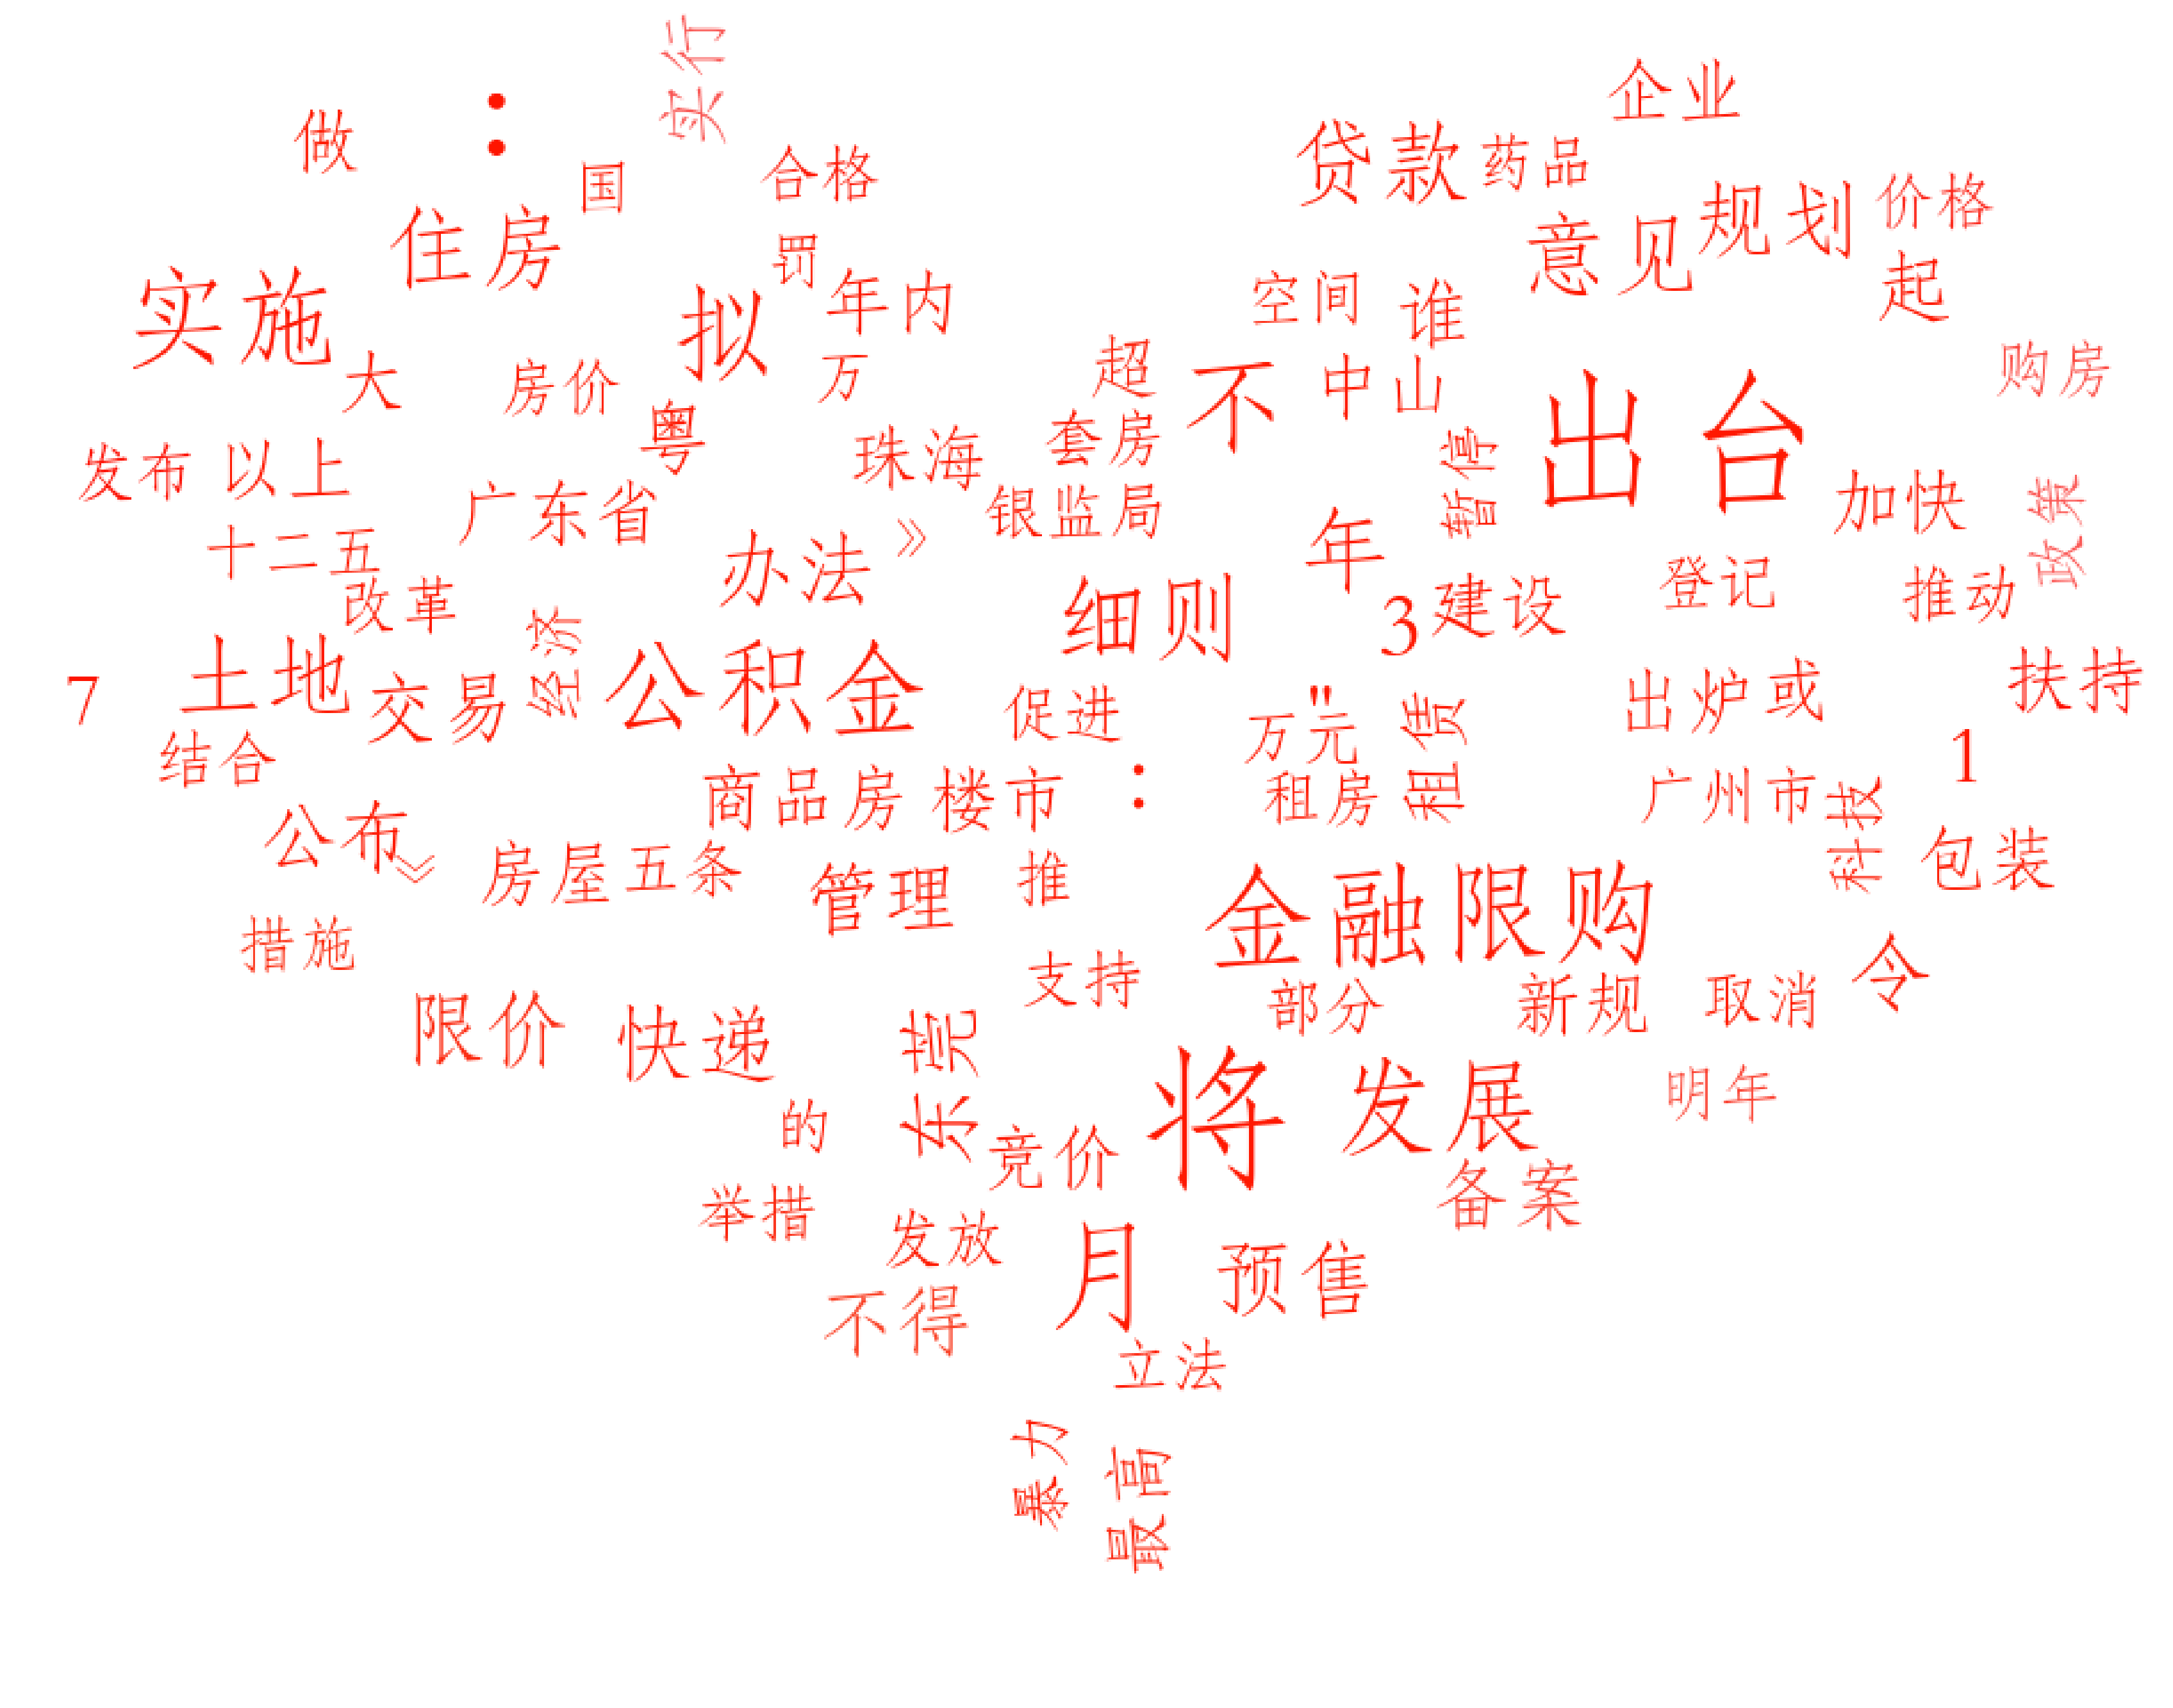

In [19]:


# //根据词频生成词云
my_wordcloud =wc1d.generate_from_frequencies(frequentWord)
#背景图片
image_colors = ImageColorGenerator(back_coloring)
#图片尺寸
plt.figure(figsize=(60,60)) 
plt.axis("off")
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.show()
